## Подключение модулей

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Загрузка данных

In [119]:
df = pd.read_csv('uber.csv')

In [5]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


## Описание данных

Признаки:

- key - уникальный идентификатор для каждой поездки

- pickup_datetime - дата и время, когда был включен счетчик

- pickup_longitude - долгота, на которой был задействован счетчик

- pickup_latitude - широта, на которой был задействован счетчик

- dropoff_longitude - долгота, на которой счетчик был отключен

- dropoff_latitude - широта, на которой счетчик был отключен

- passenger_count - количество пассажиров в автомобиле (значение вводится водителем)

Целевой (искомый) признак:

- fare_amount - стоимость каждой поездки в долларах США

## Стадии решения задачи
- подключение модулей (import modules)
- загрузка данных (data lodaing)
- разведочный анализ данных (exploratory data analysis, EDA)
- предварительная обработка данных (preprocessing)
- визуальный анализ(Visual analysis)
- обучение моделей (models fitting)
- прогнозирование (prediction)

In [8]:
df.shape

(200000, 9)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [10]:
df.describe(include='all')

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000,200000.000000,200000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
unique,NaN,200000,NaN,196629,NaN,NaN,NaN,NaN,NaN
top,NaN,2015-05-07 19:52:06.0000003,NaN,2014-04-13 18:19:00 UTC,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,4,NaN,NaN,NaN,NaN,NaN
mean,2.771250e+07,NaN,11.359955,NaN,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,NaN,9.901776,NaN,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,NaN,-52.000000,NaN,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,NaN,6.000000,NaN,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,NaN,8.500000,NaN,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,NaN,12.500000,NaN,-73.967154,40.767158,-73.963658,40.768001,2.000000


## Разведочный анализ данных (РАД, EDA)

In [12]:
df_cat = df.select_dtypes(['object'])
df_num = df.select_dtypes(['int64','float64'])

In [13]:
df_cat

,key,pickup_datetime
0,2015-05-07 19:52:06.0000003,2015-05-07 19:52:06 UTC
1,2009-07-17 20:04:56.0000002,2009-07-17 20:04:56 UTC
2,2009-08-24 21:45:00.00000061,2009-08-24 21:45:00 UTC
3,2009-06-26 08:22:21.0000001,2009-06-26 08:22:21 UTC
4,2014-08-28 17:47:00.000000188,2014-08-28 17:47:00 UTC
...,...,...
199995,2012-10-28 10:49:00.00000053,2012-10-28 10:49:00 UTC
199996,2014-03-14 01:09:00.0000008,2014-03-14 01:09:00 UTC
199997,2009-06-29 00:42:00.00000078,2009-06-29 00:42:00 UTC
199998,2015-05-20 14:56:25.0000004,2015-05-20 14:56:25 UTC


In [14]:
df_cat.isna().sum()

key                0
pickup_datetime    0
dtype: int64

In [15]:
df_cat.duplicated().sum()

0

In [16]:
for col in df_cat.columns:
    print(f'Признак "{col}" количество уникальных значений: {df_cat[col].nunique()}')

Признак "key" количество уникальных значений: 200000
Признак "pickup_datetime" количество уникальных значений: 196629


In [17]:
df_cat.describe()

,key,pickup_datetime
count,200000,200000
unique,200000,196629
top,2015-05-07 19:52:06.0000003,2014-04-13 18:19:00 UTC
freq,1,4


In [18]:
df_num

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,7.5,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,7.7,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,12.9,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,5.3,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,16.0,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...
199995,42598914,3.0,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,7.5,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,30.9,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,14.5,-73.997124,40.725452,-73.983215,40.695415,1


In [19]:
df_num.describe()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+05,200000.000000,200000.000000,200000.000000,199999.000000,199999.000000,200000.000000
mean,2.771250e+07,11.359955,-72.527638,39.935885,-72.525292,39.923890,1.684535
std,1.601382e+07,9.901776,11.437787,7.720539,13.117408,6.794829,1.385997
min,1.000000e+00,-52.000000,-1340.648410,-74.015515,-3356.666300,-881.985513,0.000000
25%,1.382535e+07,6.000000,-73.992065,40.734796,-73.991407,40.733823,1.000000
50%,2.774550e+07,8.500000,-73.981823,40.752592,-73.980093,40.753042,1.000000
75%,4.155530e+07,12.500000,-73.967154,40.767158,-73.963658,40.768001,2.000000
max,5.542357e+07,499.000000,57.418457,1644.421482,1153.572603,872.697628,208.000000


In [20]:
df_num.isna().sum()

Unnamed: 0           0
fare_amount          0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [21]:
df_num[df_num['dropoff_latitude'].isna()]

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
87946,32736015,24.1,-73.950581,40.779692,NaN,NaN,0


In [22]:
df_num.duplicated().sum()

0

In [23]:
for col in df_num.columns:
    print(f'Признак "{col}" количество уникальных значений: {df_num[col].nunique()}')

Признак "Unnamed: 0" количество уникальных значений: 200000
Признак "fare_amount" количество уникальных значений: 1244
Признак "pickup_longitude" количество уникальных значений: 71066
Признак "pickup_latitude" количество уникальных значений: 83835
Признак "dropoff_longitude" количество уникальных значений: 76894
Признак "dropoff_latitude" количество уникальных значений: 90585
Признак "passenger_count" количество уникальных значений: 8


In [24]:
df_num['passenger_count'].unique()

array([  1,   3,   5,   2,   4,   6,   0, 208], dtype=int64)

In [25]:
df_num[df_num['passenger_count'] == 0]

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
333,2137942,10.1,-74.013900,40.707800,-73.992300,40.749300,0
908,8484351,11.7,-73.981000,40.764600,-73.962900,40.778400,0
926,32941306,3.3,-73.979978,40.765821,-73.983894,40.766873,0
2000,12591041,15.7,-73.975285,40.750138,-73.974729,40.783151,0
3011,39400625,6.1,-73.977900,40.789100,-73.983700,40.773600,0
...,...,...,...,...,...,...,...
196797,26965490,3.3,-74.000760,40.757637,-74.004852,40.751947,0
197103,49116579,7.3,0.000000,0.000000,0.000000,0.000000,0
198872,12988511,5.7,-73.980300,40.742800,-73.967900,40.755600,0
198902,54393172,12.1,-73.996700,40.737200,-74.008500,40.704000,0


In [26]:
print(f'Процентное количество поездок с 0 пассажиров: {df_num[df_num['passenger_count'] == 0].shape[0] / df_num.shape[0]}')

Процентное количество поездок с 0 пассажиров: 0.003545


In [27]:
df_num[df_num['passenger_count'] == 208]

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
113038,35893772,11.7,-73.937795,40.758498,-73.937835,40.758415,208


In [28]:
for col in df_num[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']]:
    print(f'Признак "{col}"\nКоличество нормальных значений: {df_num[(-90 <= df_num[col]) & (df_num[col] <= 90)].shape[0]}\nКоличество аномальных значений: {df_num[(-90 > df_num[col]) | (df_num[col] > 90)].shape[0]}')

Признак "pickup_longitude"
Количество нормальных значений: 199992
Количество аномальных значений: 8
Признак "pickup_latitude"
Количество нормальных значений: 199996
Количество аномальных значений: 4
Признак "dropoff_longitude"
Количество нормальных значений: 199996
Количество аномальных значений: 3
Признак "dropoff_latitude"
Количество нормальных значений: 199996
Количество аномальных значений: 3


In [29]:
for col in df_num[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']]:
    print(f'Признак "{col}"\nКоличество с нулевыми координатами: {df_num[0 == df_num[col]].shape[0]}')

Признак "pickup_longitude"
Количество с нулевыми координатами: 3786
Признак "pickup_latitude"
Количество с нулевыми координатами: 3782
Признак "dropoff_longitude"
Количество с нулевыми координатами: 3764
Признак "dropoff_latitude"
Количество с нулевыми координатами: 3758


In [30]:
print(f'Признак fare_amount\nКоличество нормальных значений: {df_num[0 < df_num['fare_amount']].shape[0]}\nКоличество аномальных значений: {df_num[0 >= df_num['fare_amount']].shape[0]}')

Признак fare_amount
Количество нормальных значений: 199978
Количество аномальных значений: 22


## Предварительная обработка данных

In [121]:
def replace_passeger_count(passeger_count):  # создаем функцию
    if passeger_count == 0 or passeger_count == 208:
        return np.nan
    return passeger_count

In [123]:
def replace_coordinates(coordinates):  # создаем функцию
    if coordinates == 0 or coordinates > 90 or coordinates < -90:
        return np.nan
    return coordinates

In [125]:
def replace_fare_amount(fare):  # создаем функцию
    if fare <= 0:
        return np.nan
    return fare

In [127]:
df['passenger_count'] = df['passenger_count'].apply(replace_passeger_count)

In [129]:
for i in ['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude']:
    df[i] = df[i].apply(replace_coordinates)

In [131]:
df['fare_amount'] = df['fare_amount'].apply(replace_fare_amount)

In [133]:
from datetime import datetime
# 2014-04-13 18:19:00
df['pickup_datetime'] = df['pickup_datetime'].apply(lambda x: datetime.strptime(x.replace(' UTC', ''), '%Y-%m-%d %H:%M:%S'))

In [134]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [135]:
df.dropna(inplace=True)

In [136]:
df

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06,-73.999817,40.738354,-73.999512,40.723217,1.0
1,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56,-73.994355,40.728225,-73.994710,40.750325,1.0
2,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00,-74.005043,40.740770,-73.962565,40.772647,1.0
3,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21,-73.976124,40.790844,-73.965316,40.803349,3.0
4,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00,-73.925023,40.744085,-73.973082,40.761247,5.0
...,...,...,...,...,...,...,...,...
199995,2012-10-28 10:49:00.00000053,3.0,2012-10-28 10:49:00,-73.987042,40.739367,-73.986525,40.740297,1.0
199996,2014-03-14 01:09:00.0000008,7.5,2014-03-14 01:09:00,-73.984722,40.736837,-74.006672,40.739620,1.0
199997,2009-06-29 00:42:00.00000078,30.9,2009-06-29 00:42:00,-73.986017,40.756487,-73.858957,40.692588,2.0
199998,2015-05-20 14:56:25.0000004,14.5,2015-05-20 14:56:25,-73.997124,40.725452,-73.983215,40.695415,1.0


## Визуальный анализ

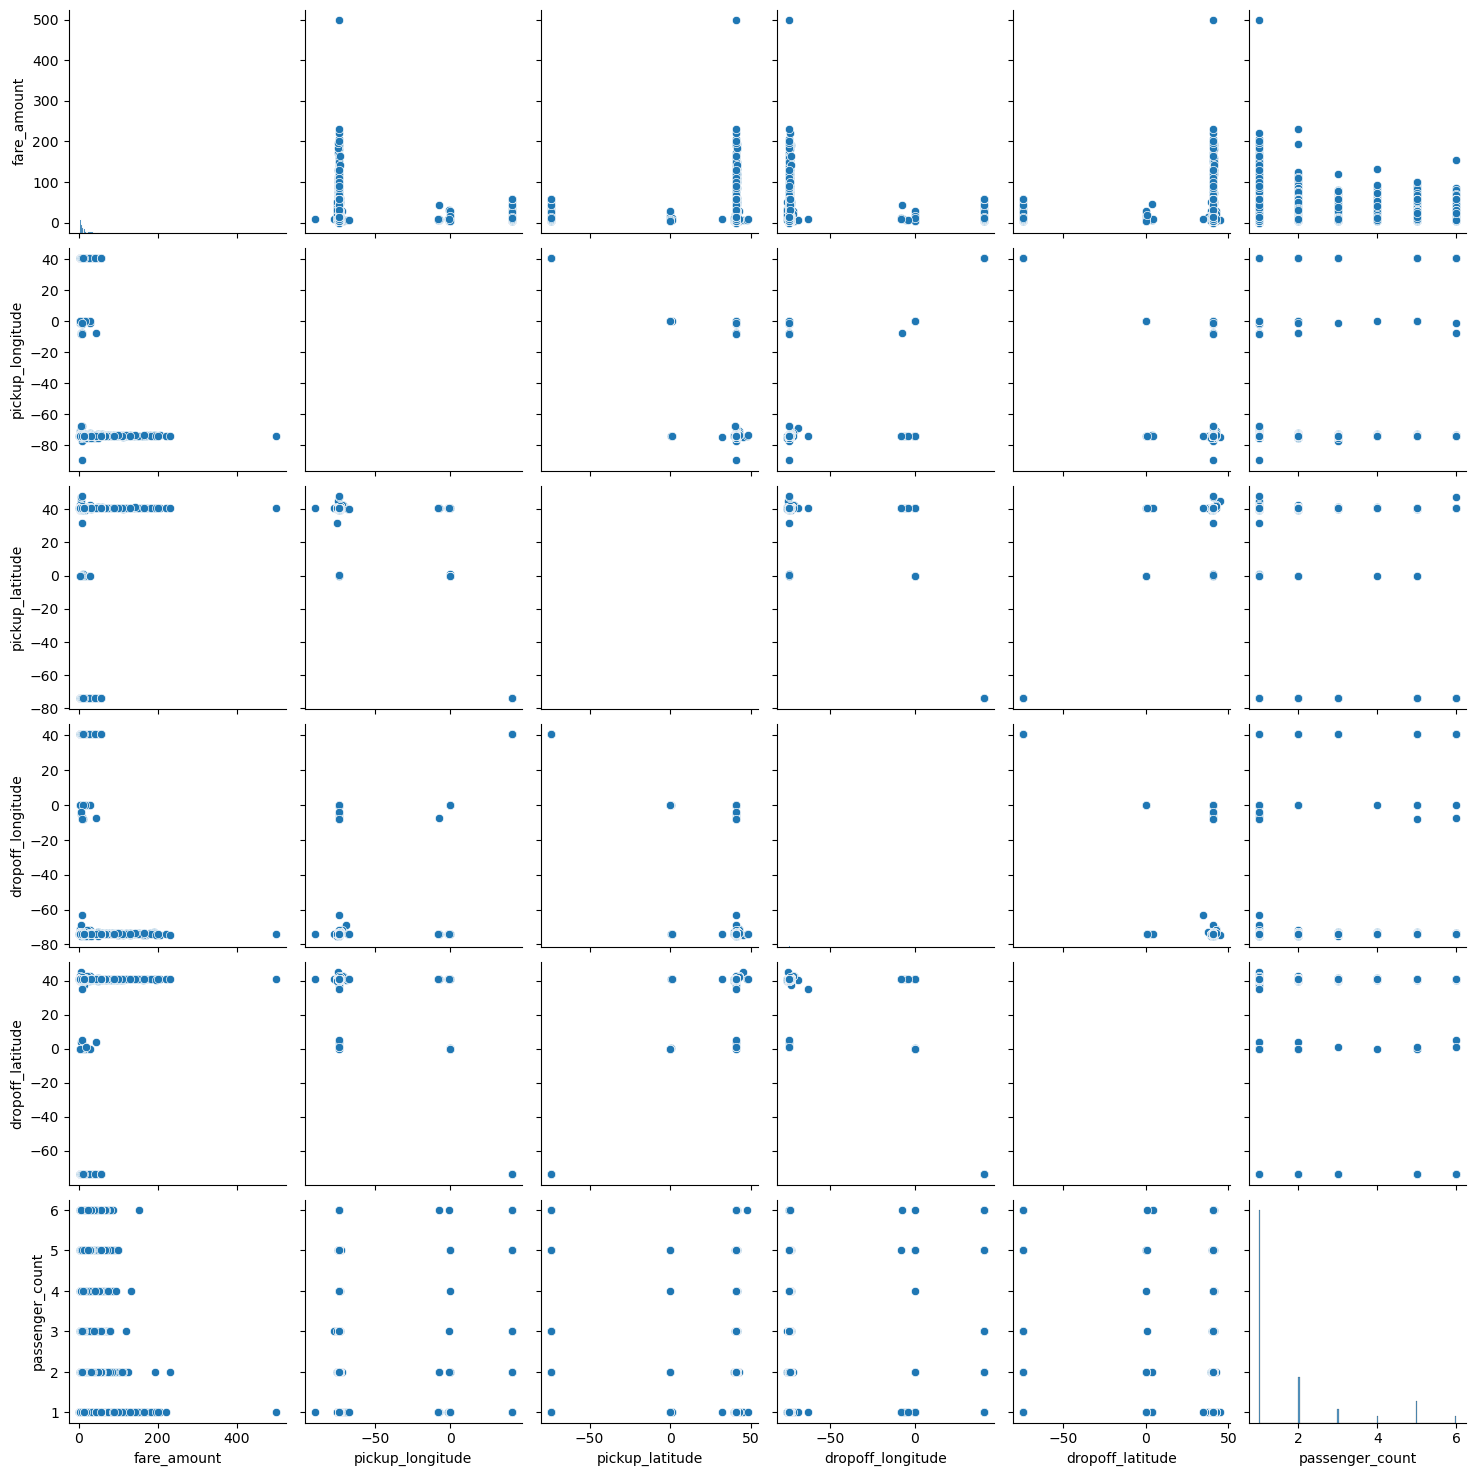

In [43]:
sns.pairplot(df)

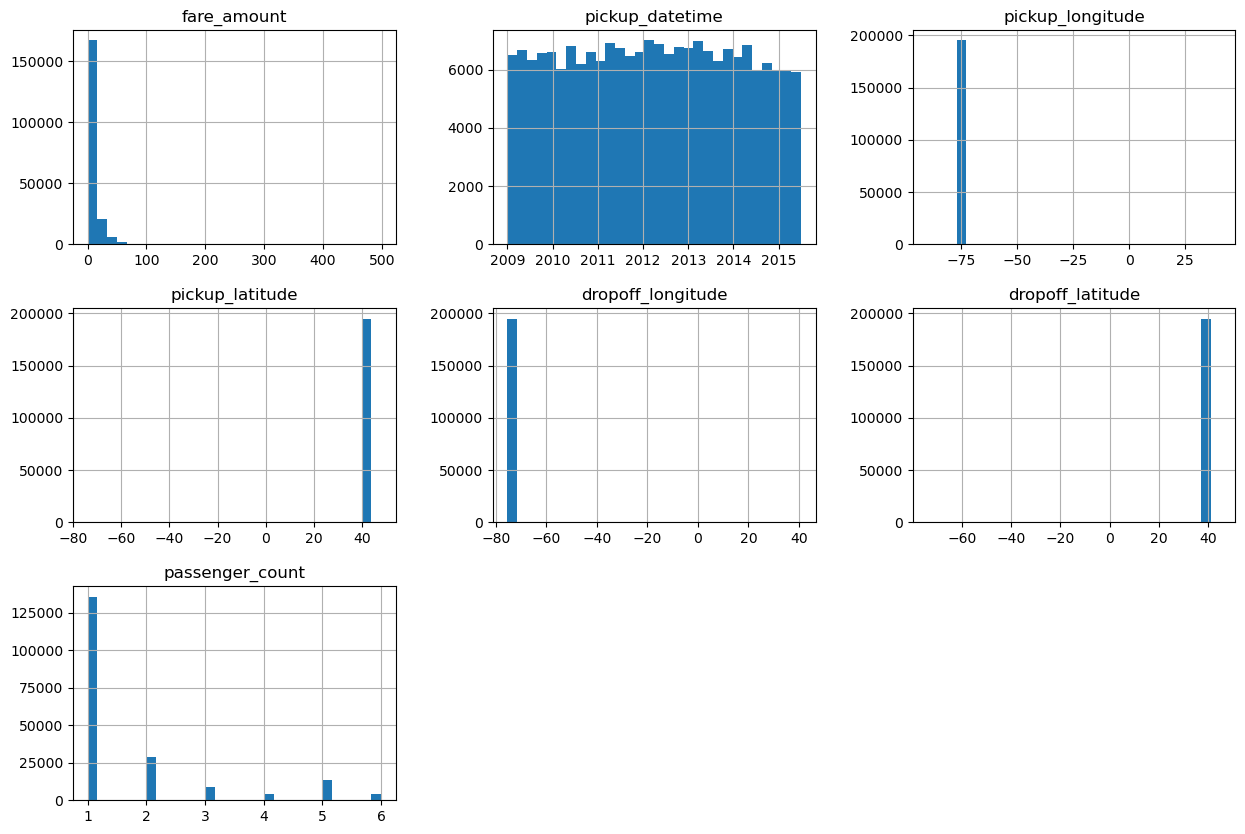

In [44]:
df.hist(figsize = (15,10), bins = 30);

<Axes: >

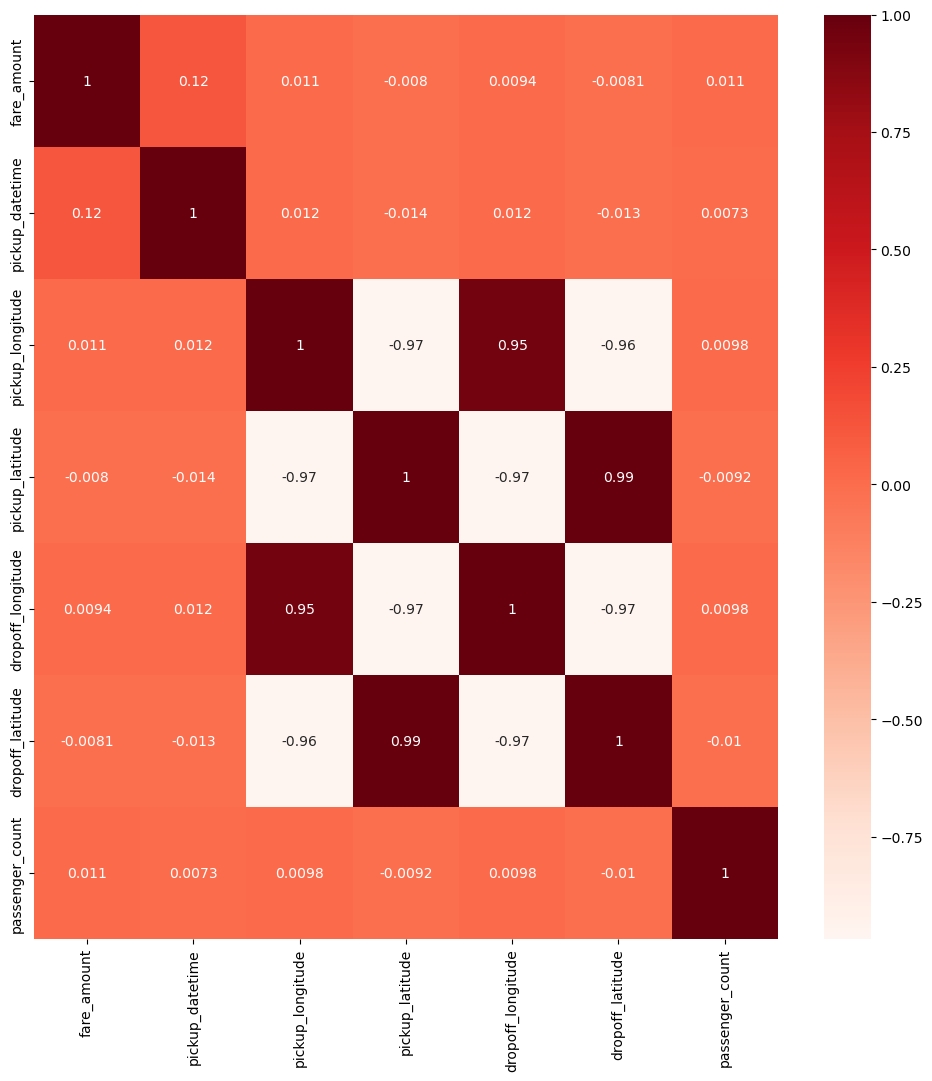

In [46]:
plt.figure(figsize=(12,12))
sns.heatmap(df[['fare_amount', 'pickup_datetime', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']].corr(), annot=True, cmap='Reds')

## Обучение и прогнозирование моделей

In [150]:
X = df[['pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'passenger_count']]
y = df['fare_amount']

In [152]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y ,test_size=0.3, random_state=42)

In [168]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import metrics

### Линейная регрессия

In [155]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()

In [157]:
reg.fit(X_train,Y_train)

LinearRegression()

In [160]:
y_pred=reg.predict(X_test)

In [170]:
print('mean_Absolute-Error',metrics.mean_absolute_error(Y_test,y_pred))

mean_Absolute-Error 6.024999108337602


In [172]:
print('mean-squared-error',metrics.mean_squared_error(Y_test,y_pred))

mean-squared-error 93.55357986795842


In [166]:
print('r2score',metrics.r2_score(Y_test,y_pred))

r2score 0.0004536337357529119


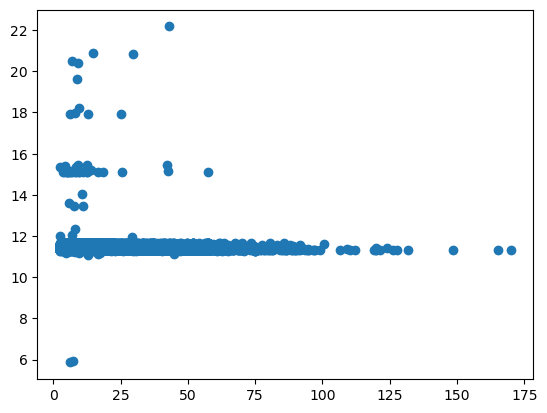

In [162]:
plt.scatter(Y_test,y_pred)

## Дерево принятия решений

In [175]:
from sklearn.tree import DecisionTreeRegressor
decision_tree_regressor = DecisionTreeRegressor()

In [177]:
decision_tree_regressor.fit(X_train, Y_train)

DecisionTreeRegressor()

In [179]:
y_pred = decision_tree_regressor.predict(X_test)

In [181]:
print('mean_Absolute-Error',metrics.mean_absolute_error(Y_test,y_pred))

mean_Absolute-Error 2.93019531185043


In [183]:
print('mean-squared-error',metrics.mean_squared_error(Y_test,y_pred))

mean-squared-error 38.67510745448242


In [185]:
print('r2score',metrics.r2_score(Y_test,y_pred))

r2score 0.5867869174480709


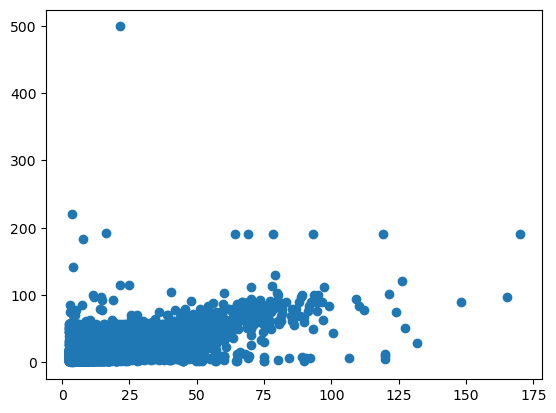

In [187]:
plt.scatter(Y_test,y_pred)

## Случайный лес

In [190]:
from sklearn.ensemble import RandomForestRegressor
random_forest_regressor = RandomForestRegressor(max_depth=9)
random_forest_regressor.fit(X_train, Y_train)

RandomForestRegressor(max_depth=9)

In [191]:
y_pred = random_forest_regressor.predict(X_test)

In [192]:
print('mean_Absolute-Error',metrics.mean_absolute_error(Y_test,y_pred))

mean_Absolute-Error 3.1882641765079422


In [196]:
print('mean-squared-error',metrics.mean_squared_error(Y_test,y_pred))

mean-squared-error 24.26745084580658


In [198]:
print('r2score',metrics.r2_score(Y_test,y_pred))

r2score 0.7407213882605267


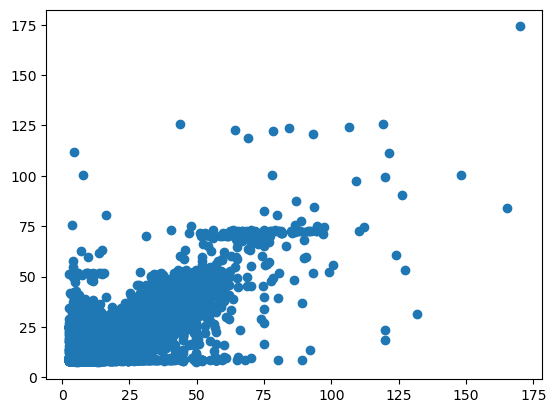

In [200]:
plt.scatter(Y_test,y_pred)

# Вывод

### В данной работе было проделано следующие этапы:
- Подключение модулей;
- Загрузка данных;
- Разведочный анализ данных;
- Предварительная обработка данных;
- Обучение моделей;
- Прогнозирование моделей.

### Были обучены следующие модели:
- LinearRegression;
- DecisionTreeRegressor;
- RandomForestRegressor.

После просмотренных результатов по предсказанию моделей, самая лучшая модель оказалась:
- RandomForestRegressor.